In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Latex
from sympy.vector import CoordSys3D, Del
plt.style.use('rose-pine-moon')
my_cmap = plt.get_cmap('viridis')
%matplotlib inline

### 1. Vector Fields

Vector field are these mathematical object that assigns a vector to every point in a space. Vector fields are represented as follows:
- $F(x,y,z) = P\hat{\mathbf{i}}+ Q\hat{\mathbf{j}} + R\hat{\mathbf{k}}, \; x,y,z \in \mathbb{R}^3$ and *P,Q and R* are functions in the region.
- Vector field at a point is the field which starts at that point and points in direction defined by the field.

#### 1.1 Examples

Example1: $F(x, y) = 2\hat{\mathbf{i}}$

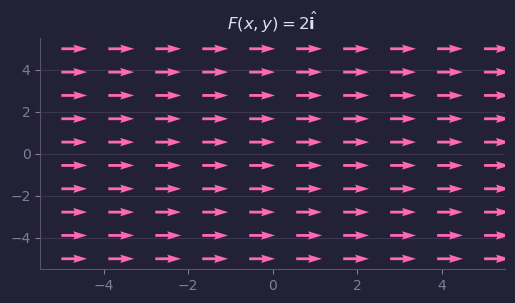

In [2]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5,10))
u = np.ones_like(x)
v = np.zeros_like(y)


fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.quiver(x, y, u, v, color='hotpink')
ax.set_title(r'$F(x,y) = 2\hat{\mathbf{i}}$');

Example2: $F(x,y) = -x\hat{\mathbf{i}} -y\hat{\mathbf{j}}$

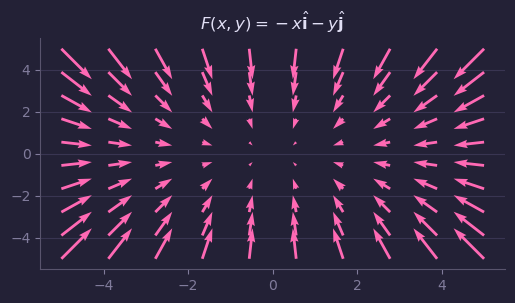

In [3]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5,10))
u = -x
v = -y

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.quiver(x, y, u, v, color='hotpink')
ax.set_title(r'$F(x,y) = -x\hat{\mathbf{i}} -y\hat{\mathbf{j}}$');

Observation: Every vector starts from point input to vector field and terminates at zero.

Example3: $F(x,y) = y\hat{\mathbf{i}} -x\hat{\mathbf{j}}$

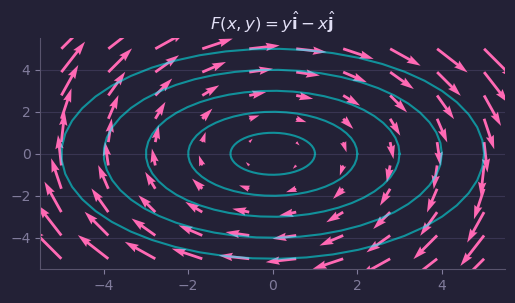

In [4]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5,10))
u = y
v = -x
t = np.linspace(0, 2*np.pi, 50)

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.quiver(x, y, u, v, color='hotpink')
for i in range(6):
    ax.plot(i*np.cos(t),i*np.sin(t), color='cyan', alpha=0.5)
ax.set_title(r'$F(x,y) = y\hat{\mathbf{i}} -x\hat{\mathbf{j}}$');

Observation: The vector fields are tangent to circles orignating at circle and terminating at $F(x,y) = y\hat{\mathbf{i}} -x\hat{\mathbf{j}}$

Example4: $F(x,y) = x\hat{\mathbf{i}} - 2y\hat{\mathbf{j}}$

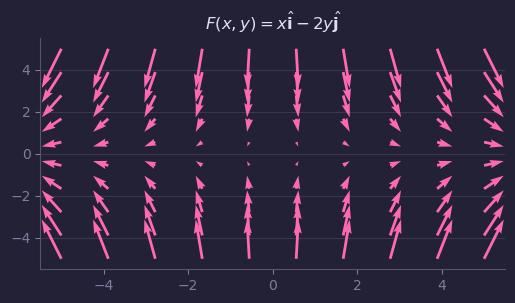

In [5]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5,10))
u = x
v = -2*y

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.quiver(x, y, u, v, color='hotpink')
ax.set_title(r'$F(x,y) = x\hat{\mathbf{i}} -2y\hat{\mathbf{j}}$');

Example5: $F(x,y) = \frac{x}{\sqrt{x^2+y^2}} \hat{\mathbf{i}} + \frac{y}{\sqrt{x^2+y^2}}\hat{\mathbf{j}}$

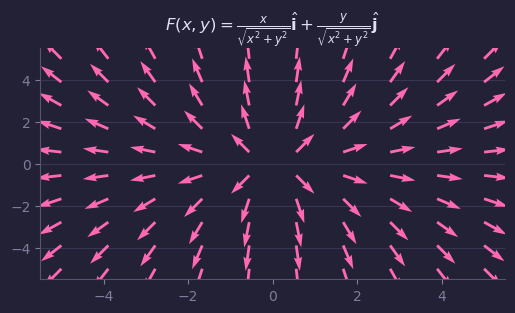

In [6]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5,10))
u = x / (x**2 + y**2) **0.5
v = y / (x**2 + y**2) **0.5

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)
ax.quiver(x, y, u, v, color='hotpink')
ax.set_title(r'$F(x,y) = \frac{x}{\sqrt{x^2+y^2}} \hat{\mathbf{i}} + \frac{y}{\sqrt{x^2+y^2}}\hat{\mathbf{j}}$');

Observation: Every vector is a unit vector and points outwards.

### 2. Conservative Vector Field

#### 2.1 Gradients are Vector Fields

Consider a function $f(x,y)$ than its gradient is given as:
$$\nabla f(x,y, z) = f_x \hat{\mathbf{i}} + f_y \hat{\mathbf{j}} +  f_z \hat{\mathbf{k}}$$
where $f_x$, $f_y$  and $f_z$ are partial derivatives of $f(x,y,z)$ w.r.t x,y and z. We can see that this resembles our defininition of vector fields, where $P=f_x$, $Q = f_y$ and $R=f_z$. Therefore we can conclude **Gradient of a function is a vector field**.

#### 2.2 Conservative Vector Field Definition

A vector fields that results from *gradient of a function* is called a **conservative field**. The orignal function is called **potential function**.

Example $f(x,y,z) = y\ln(x + z)$

In [7]:
x,y,z = sp.symbols('x,y,z')
f = y*sp.ln(x+z)
f_grad = [sp.diff(f, x), sp.diff(f, y), sp.diff(f, z)]
print(f'Conservative vector field: {f_grad}')

Conservative vector field: [y/(x + z), log(x + z), y/(x + z)]


### 3. Divergence & Curl

#### 3.1 Divergence

Measurement of how much fluid/flow/vector field of particles *enters* the neighbourhood around a surface compared to how much *leaves*. <br>
Some properties of divergence:
- If *more flow/fluid enters the region then leaves it*, then the divergence at point P is *negative*.

-  If *flow/fluid enters the region equals to flow that leaves it*, then the divergence is *zero*. The divergence at the point P is called as **incompressible**.

- If *more flow/fluid leaves the region then enters it*, then the divergence at point P is *positive*. The divergence at poit P is called **Divergent**.

Mathematically, let there be a function $F(x, y, z) = P \hat{\mathbf{i}} + Q \hat{\mathbf{j}} + R \hat{\mathbf{k}}$. 

Then the Gradient Operator can be repersented as :
$$\nabla = 
\frac{\partial}{\partial x} \hat{\mathbf{i}} + \frac{\partial}{\partial x} \hat{\mathbf{j}} + \frac{\partial}{\partial x} \hat{\mathbf{k}} 
$$
Then divergence of F is represented as:
$$ \text{Div F} = \nabla \cdot F = \frac{\partial O}{\partial x} \hat{\mathbf{i}} + \frac{\partial Q}{\partial x} \hat{\mathbf{j}} + \frac{\partial R}{\partial x} \hat{\mathbf{k}} $$
Note Divergence is a scalar function (as a result of dot product).

#### 3.2 Curl

Measurement of tendency of a fluid/flow to rotate in a vector field around a point. 

Properties:
- If curl is *positive* at a point then flow would rotate *counter-clockwise*.
- If curl is *negative* at a point then flow would rotate *clockwise*.
- If curl is *zero* at a point than there is no rotation at point and the vector field is irrotational.

Mathematically:
$$
\text{Curl F} = \nabla \times F = 
\begin{vmatrix} 
\hat{i} & \hat{j} & \hat{k} \\ \dfrac{\partial}{\partial x} & \dfrac{\partial}{\partial y} & \dfrac{\partial}{\partial z} \\ P & Q & R 
\end{vmatrix}.
$$

Note that curl will be a vector (due to cross product).

Also the maximum rotation of flow is given by the magnitude of curl along the curl.

#### 3.3 Divergence & Curl Examples

Example $F(x,y,z) = -x\hat{\mathbf{j}}$


In [8]:
x, y, z = sp.symbols('x,y,z')
C = CoordSys3D('C')
delop = Del()
f = -C.x*C.j
print(f'Divergence: {delop.dot(f).doit()}\nCurl: {delop.cross(f).doit()}')

Divergence: 0
Curl: (-1)*C.k


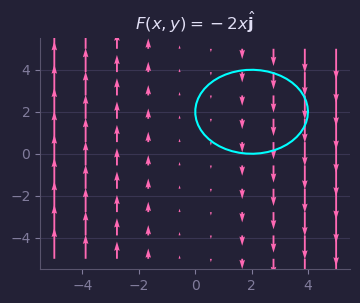

In [9]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5,10))
u = np.zeros_like(x)
v = -2*x
t = np.linspace(0, 2*np.pi, 50)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.quiver(x, y, u, v, color='hotpink')
ax.plot(2*np.cos(t) + 2, 2*np.sin(t)+2, color='cyan')
ax.set_title(r'$F(x,y) = -2x\hat{\mathbf{j}}$');

Observations:
- Since the vectors entering is equal to the vectors leaving horizontally, *divergence is zero*.
- If we look vertically, the vectors entering and leaving on left are small in magnitude and vectors entering and leaving on right are larger in magnitude, so we can observe vector to rotate clockwise and therefore *curl is negative*.

Example2: $F(x,y, z) = \frac{x}{\sqrt{x^2+y^2}} \hat{\mathbf{i}} + \frac{y}{\sqrt{x^2+y^2}}\hat{\mathbf{j}}$

In [10]:
x, y, z = sp.symbols('x,y,z')
C = CoordSys3D('C')
delop = Del()
f = C.x / (C.x**2 + C.y**2)**0.5 * C.i + C.y / (C.x**2 + C.y**2)**0.5 * C.j
print(f'Divergence: {delop.dot(f).doit().simplify()}\nCurl: {delop.cross(f).doit()}')

Divergence: 1.0/(C.x**2 + C.y**2)**0.5
Curl: 0


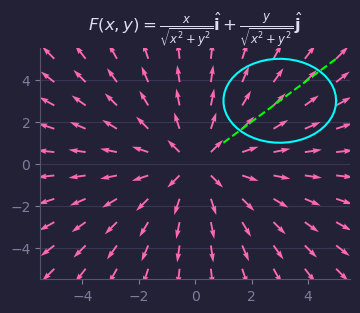

In [11]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5,10))
u = x / (x**2 + y**2) **0.5
v = y / (x**2 + y**2) **0.5
t = np.linspace(0, 2*np.pi, 50)

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.quiver(x, y, u, v, color='hotpink')
ax.plot(2*np.cos(t) + 3, 2*np.sin(t) + 3, color='cyan')
ax.plot([1,5], [1,5], color='lime', ls='--')
ax.set_title(r'$F(x,y) = \frac{x}{\sqrt{x^2+y^2}} \hat{\mathbf{i}} + \frac{y}{\sqrt{x^2+y^2}}\hat{\mathbf{j}}$');

Observation:
- We can see that number of arrows leaving is greater than arrows entering and thus $\text{Div F(x,y,z)} \geq 0 $
- We can also see the number of arrows looked along the diameter (lime) are same on either side and therfore $\text{curl F(x,y,z)} = 0$.

Example3: $F(x, y, z) = xy \hat{\mathbf{i}} + xz \hat{\mathbf{j}} + xyz^2 {\mathbf{k}}$ at point $P(-1, 2, 1)$.

In [12]:
x,y,z = sp.symbols('x,y,z')
C = CoordSys3D('C')
delop = Del()

f = C.x*C.y*C.i + C.x*C.z*C.j + C.x*C.y*C.z**2*C.k

divergence = delop.dot(f).doit().simplify()
curl = delop.cross(f).doit().simplify()
print('divergence ')
display(divergence)
print('curl')
display(curl)

divergence 


C.y*(2*C.x*C.z + 1)

curl


(C.x*(C.z**2 - 1))*C.i + (-C.y*C.z**2)*C.j + (-C.x + C.z)*C.k

In [13]:
div_p = divergence.subs({C.x: -1, C.y: 2, C.z: 1})
curl_p = curl.subs({C.x: -1, C.y: 2, C.z: 1})
print('divergence at P(-1, 2, 1)')
display(div_p)
print('Curl at P(-1, 2, 1)')
display(curl_p)
print('Maximum rotation')
display(sp.sqrt(curl_p.dot(curl_p)))

divergence at P(-1, 2, 1)


-2

Curl at P(-1, 2, 1)


(-2)*C.j + 2*C.k

Maximum rotation


2*sqrt(2)

### 4. Line Integrals

#### 4.1 Multivalued functions & Mass

We know that integral gives the area under the curve. But it can also be looked in the following manner: *assume that the fucntion represents the mass desnsity function than the integral gives the mass*.

*Multivalued Functions*

- One might think this goes against the notion of definition of function, as a function means every input has an unique image in its range. 
- But there are some functions called [multivalued functions](https://en.wikipedia.org/wiki/Multivalued_function) that has two or more values in its range for atleast one point in its domain.
- For example every real number greater than zero has two real square roots, so that square root may be considered a multivalued function. For example, we may write $\sqrt{4} = \pm 2$
- Other example involve inverse of trignometric functions. In the graph below of function $\arcsin x$ for values of x we have multiple values of y if we do not restrict the range to be $[-\pi /2, \pi / 2]$ 

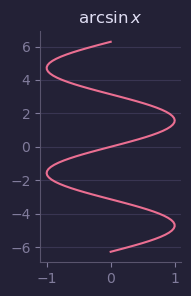

In [14]:
t = np.linspace(-2*np.pi, 2*np.pi, 100)
fig = plt.figure(figsize=(4,3))

ax = fig.add_subplot(1,2,1)
ax.plot(np.sin(t), t)
ax.set_title(r'$\arcsin x$');

Note one can think of taking integration along y-axis (which is what has been done to compute inverse of sine in above graph - interchanging the axis) but if that was not possible, the wire still would have a mass.

Subsequently we talk about how do we solve the following problem.

#### 4.2 Scalar Line Integral

- Let C be a smooth curve in space given by the parameterization:<br><br>
$r(t) = \langle x(t), y(t), z(t) \rangle, \; a\leq t \leq b$<br><br>
- Let $(f,x,z)$ be a function with a domain that includes the curve C. To define the line integral of the function *f* over *C*, we chop the curve into small pieces.

- Partition the parameter interval $[a, b]$ into n subintervals $[t_{i-l}, t_i]$ of equal width for $1 \leq i \leq n$, where $t_0 = a$ and $t_n = b$.

- Let $t_i^*$ be a value in the ith interval $[t_{i-l}, t_i]$. Denote the endpoints of $r(t_0), r(t_1), \dots r(t_n)$ by $P_0, \dots, P_n$. 

- Points $P_i$ divide the curve *C* into *n* pieces $C_1, C_2, \dots, C_n$ with lengths $\Delta s_1, \Delta s_2, \dots, \Delta s_n$ respectively.

- Multiply $f(P_i^*)$ by the length $\Delta s_1$ of $C_1$ which gives the area of "sheet" with base $C_1$, and height $f(P_i^*)$

- Now, we form the sum $\displaystyle \sum_{i=1}^n f(P_i^*) \Delta s_i$. As $\Delta s \to 0$ we get the following definition of Scalar Line Integral:<br><br>
$ \displaystyle \int_C f(x,y)\;ds = \lim\limits_{n \to \infty} \sum_{i=1}^n f(P_i^*) \Delta s_i$.

**Geometrical Intrepetion**
-  Suppose that $f(x,y)\geq 0$ for all points $(x,y)$ on a smooth planar curve $C$. Imagine taking curve $C$ and projecting it "up" to the surface defined by $f(x,y)$, thereby creating a new curve $C'$ that lies in the graph of $f(x,y)$.
- Now we drop a "sheet" from $C'$ down to the xy-plane. The area of this sheet is $\int_Cf(x,y)ds$. 
- If $f(x,y)\leq0$ for some points in C, then the value of $\int_Cf(x,y)ds$ is the area above the xy-plane less the area below the xy-plane.

For a three variable function:
If *f* is defined on a curve *C* given parameterically by $r(t) = g(t) \hat{\mathbf{i}}  + h(t) \hat{\mathbf{j}} + k(t)\hat{\mathbf{k}}, \; a \leq t \leq b$, then line integral of *f* over *C* is:
$$
\int_c f(x,y,z)ds = \int_a^b f(g(t), h(t), k(t))\lVert r'(t) \rVert dt
$$ 


##### 4.2.1 Examples

**Example 1**: Integrate $f(x,y,z) = x - 3y^2 + z$ over line segment C joining the origin to the point (1,1,1).

Solution: Any choice of parameterization would work, we choose a simpler one:<br>
$$r(t) = t \hat{\mathbf{i}} + t \hat{\mathbf{j}} + t\hat{\mathbf{k}}, \qquad 0 \leq t \leq 1 \\[1em]
\lVert r'(t) \rVert = \lVert \hat{\mathbf{i}} +\hat{\mathbf{j}} + \hat{\mathbf{k} } \rVert = \sqrt{3}
$$
$$
\begin{align*}
\Rightarrow \int_c f(x,y,z) ds 
&= \int_0^1f(t,t,t)\sqrt{3} dt \\[1em]
&= \int_0 (t-3t^2 + t)\sqrt{3} dt \\[1em]
&= \sqrt{3} \left[t^2 - t^3 \right]_0^1 = 0
\end{align*}
$$


**Example 2**: Consider $f(x,y,z) = 2xy + \sqrt{z}$ over the helix $r(t) = \cos t \hat{\mathbf{i}} + \sin t \hat{\mathbf{j}} + t \hat{\mathbf{k}},\; 0 \leq t \leq \pi$.

Solution:
1. $r'(t) = -\sin t \hat{\mathbf{i}} + \cos t \hat{\mathbf{j}} + \hat{\mathbf{k}} \\[1em] 
\Rightarrow \lVert r'(t) \rVert = \sqrt{(-\sin t)^2 + (\cos t)^2 + 1} = \sqrt{2}$

2. $f(r(t)) = f(\cos t, \sin t, t) = 2\cos t \sin t + \sqrt{t} = \sin 2t + \sqrt{t}$

3. $\displaystyle \int_c f(x,y,z)\;ds = \int_0^{\pi} \left( \sin 2t + \sqrt{t} \right) \sqrt{2}\;dt$

In [15]:
t = sp.symbols('t')
expr = 2**0.5 * (sp.sin(2*t) + t**0.5)
line_integral = sp.integrate(expr, (t, 0, sp.pi)).simplify()
print(f'Line integral : {float(line_integral):.4f}')

Line integral : 5.2499


### 5. Conservative Vector Fields & Line Integrals

#### 5.1 Curves and Regions

**Closed Curves**: A curve that begins and ends at the same point.

**Simple Curves**: A curve that does not cross itself.

A curve C with  parameterization $r(t), \; a \leq t \leq b$ is:
- 'closed' if $r(a) = r(b)$
- 'simple' if there exsists a parameterization of $r(t), a \leq t \leq b$ of C such that r is one-to-one over (a,b).

**Example-1:** <br>
a. $r(t) = \langle \cos t, \sin(2t)/2 \rangle,\;a\leq t \leq b$. <br>
b. $r(t) = \langle 2\cos t, 3\sin t \rangle,\; 0 \leq t \leq 6\pi$

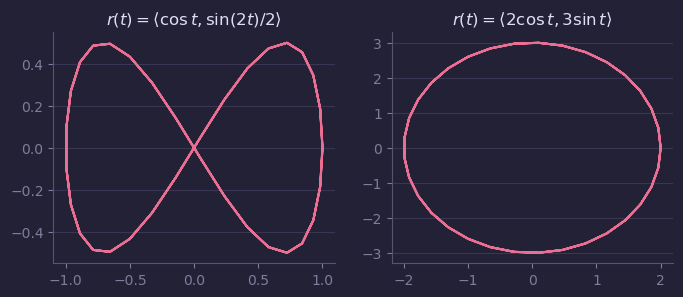

In [16]:
t = np.linspace(0,6*np.pi, 100)
fig = plt.figure(figsize=(8,3))

ax = fig.add_subplot(1,2,1)
ax.plot(np.cos(t), 0.5*np.sin(2*t))
ax.set_title(r'$r(t) = \langle \cos t, \sin(2t)/2 \rangle$')

ax = fig.add_subplot(1,2,2)
ax.plot(2*np.cos(t), 3*np.sin(t))
ax.set_title(r'$r(t) = \langle 2\cos t, 3\sin t \rangle$');

Observation:<br>
a. Closed but not simple, $r(\pi/2) = r(3\pi/2)$ <br>
b. Simple and Closed.

##### Connected Regions

Some Terminologies:
- **Connected Region**: For any two points $P_1$ and $P_2$, there is a path from $P_1$ to $P_2$ with a trace contained entierly inside *D*.
- **Simply Connected Regions**: A region D is a simply connected region if D is connected for any simple closed curve C that lies inside D, and curve C can be shrunk continuously to a point while staying entirely inside D. 

#### 5.2 Fundamental Theorem for Line Integrals

Recall the Fundamental Theorem of Calculus says that if a function *f* has an antiderivative *F*, then the integral of *f* from **a* to *b* depends only on the values of *F* at **a* and at *b* —that is
$$\int_a^b f(x)dx = F(b)-F(a)$$

**Line integrals**

Let *C* be a piecewise smmooth curve with parameterization $r(t),\;a\leq t \leq b$. Let f be a function of two or three variables with first-order partial derivatives that exist and are continuous on C. Then:
$$ \int_C \nabla f\cdot dr = f(r(b)) - f((r(a)))$$

**Conservative Fields**

For a conservative Field *F* , there a potential function such that $\nabla f = F$. Therefore
$$\int_C F\cdot dr = \int_C \nabla f \cdot dr = f(r(b)) - f(r(a))$$

**Example**: Calculate integral $\int_C F\cdot dt$, where $F(x,y,z) = \langle 2x\ln y, \frac{x^2}{y} + z^2 , 2yz \rangle$ an *C* is a curve with parametrization $r(t) = \langle t^2, t, t \rangle,\;1\leq t\leq e$.

Solution:
$$
\begin{align*}
\int_c F.dr &= \int_c \nabla f \cdot dr \\[1em]
            &= f(r(e)) - f(r(1)) \\[1em]
            &= f(e^2, e, e) - f(1,1,1) \\[1em]
            &= e^4  + e^3 - 1
\end{align*}
$$
We verify using simple line intergrals
$$\int_c F.dr = \int_1^eF(r(t)) \cdot r'(t) dt$$

In [17]:
t, x, y, z = sp.symbols('t,x,y,z')
F = sp.Matrix([2*x*sp.ln(y), x**2/y+z**2, 2*y*z])
r = sp.Matrix([t**2, t, t])
expr = F.subs({x:r[0], y:r[1], z:r[2]}).dot(sp.diff(r, t))
print(f'Line integral:')
display(sp.integrate(expr,(t,1,sp.E)))

Line integral:


-1 + exp(3) + exp(4)

**Example**: Given that $f(x,y)=(x−1)^2y+(y+1)^2x$ is a potential function for $F(x,y)=\langle 2xy−2y+(y+1)2,(x−1)2+2yx+2x\rangle$, calculate integral $\int_X F dr$, where C is the lower half of the unit circle oriented counterclockwise.

**Solution**: r = 1 so, parameterization would be $x = \cos t, y = \sin t, z = 0$ and $a=\pi,\;b=2\pi$.
$$r(t) = \langle \cos t, \sin t, 0 \rangle \\[1em] a=\pi \;, b = 2\pi$$

In [18]:
expr = (sp.cos(t) - 1)**2 * sp.sin(t) + (sp.sin(t) - 1)**2 * sp.cos(t)
expr.subs({t:2*sp.pi}) - expr.subs({t:sp.pi})

2

#### 5.3 Path Independence 

The Fundamental Theorem for Line Integrals has two important consequences: 
- If curve is closed than line integral will be zero as $f(r(b)) = f(r(a))$.

- The second important consequence of the Fundamental Theorem for Line Integrals is that line integrals of conservative vector fields are independent of path—meaning, they depend only on the endpoints of the given curve, and do not depend on the path between the endpoints.

Converse is also true, If *F* is a continuous vector field that is independent of path and the domain *D* of *F* is open and connected, then *F* is conservative.

**Example**: Show that $F(x,y)=\langle xy,x^2y^2\rangle$ is not path independent by considering the line segment from (0,0) to (0,2) and the piece of the graph of $y=x^2/2$ that goes from (0,0) to (0,2).

**Solution**: $r_1(t) = \langle t, t \rangle$ and $r_2(t) = \langle t, \frac{t^2}{2} \rangle$. Then we calulate two line integrals as follows:

In [19]:
x, y, t = sp.symbols('x,y,t')
F = sp.Matrix([x*y, x**2*y**2])
r1 = sp.Matrix([t,t])
r2 = sp.Matrix([t, t**2 / 2])

expr1 = F.subs({x:r1[0], y:r1[1]}).dot(sp.diff(r1, t))
expr2 = F.subs({x:r2[0], y:r2[1]}).dot(sp.diff(r2, t))

display(Latex(r'$\displaystyle \int_{C_1} F \cdot dr$'))
display(sp.integrate(expr1, (t, 0, 1)))
display(Latex(r'$\displaystyle \int_{C_2} F \cdot dr$'))
display(sp.integrate(expr2, (t, 0, 1)))

<IPython.core.display.Latex object>

8/15

<IPython.core.display.Latex object>

5/32

#### 5.4 Finding Potential Functions

Finding a potential function for a conservative vector field $F(x, y) = \langle P(x,y), Q(x,y) \rangle$

1. Integrate *P* with respect to *x*. This results in a function of the form $g(x,y)+h(y)$, where $h(y)$ is unknown.

2. Take the partial derivative of $g(x,y)+h(y)$ with respect to *y*, which results in the function $g_y(x,y)+h'(y)$.

3. Use the equation $g_y(x,y)+h'(y)=Q(x,y)$ to find $h'(y)$.

4. Integrate $h'(y)$ to find $h(y)$.

5. Any function of the form $f(x,y)=g(x,y)+h(y)+C$, where *C* is a constant, is a potential function for $F$.

**Example**: Find potentional function for $F(x,y,z) = \langle 2xy, x^2 + 2yz^3, 3y^2z^2 + 2z \rangle$.

Solution: 
1. $f_x(x,y,z)=2xy \Rightarrow f(x,y,z) = x^2y + g(y,z)$  for some function of *g*.
2. $f_y(x,y,z) = x^2 + 2yz^3 = x^2 + g_y(y,z) \Rightarrow g_y(y, z) = 2yz^3$
3. $g(y,z) = y^2z^3 = h(z)$
4. $f(x,y,z) = x^2y + g(y,z) = x^2y + y^2z^3 + h(z)$ 
5. $f_z(x,y,z) = 3y^2z^2 + h'(z) = 3y^2z^2 + h'(z) \Rightarrow h(z) z^2 + C$
6. Let $C=0$ than $f(x,y,z) = x^2y + y^2z^3 + z^2$

#### 5.5 Testing a Vector Field

**The Cross-Partial Property of Conservative Vector Fields**

Let $F=\langle P,Q,R\rangle$ be a vector field on an open, simply connected region $D$. Then $P_y=Q_x$, $P_z=R_x$, and $Q_z=R_y$ throughout $D$ if and only if $F$ is conservative.

Example: Determine whether vector field $F(x,y,z)=\langle xy^2z,x^2yz,z^2\rangle$ is conservative.

Solution: Instead of computing 6 different partials we can compute jacobian and get partials from there.

In [20]:
x,y,z = sp.symbols('x,y,z')
v = sp.Matrix([x*y**2*z, x**2*y*z, z**2])
display(v.jacobian(sp.Matrix([x,y,z])))

Matrix([
[ y**2*z, 2*x*y*z, x*y**2],
[2*x*y*z,  x**2*z, x**2*y],
[      0,       0,    2*z]])

If elements on either side of the diagonal are not equal than the field would not be conservative. We can see that $P_z \neq R_x$ and $Q_z \neq R_y$

**Example**: Let $F(x,y)=\langle 4x^3y^4,4x^4y^3 \rangle$, and suppose that a particle moves from point (4,4) to (1,1) along any smooth curve. Is the work done by F on the particle positive, negative, or zero?

Solution: <br>
A. Proving field is conservative

In [21]:
x,y = sp.symbols('x,y')
F = sp.Matrix([4 * x**3 * y**4, 4 * x**4 * y**3])
display(F.jacobian(sp.Matrix([x,y])))

Matrix([
[12*x**2*y**4, 16*x**3*y**3],
[16*x**3*y**3, 12*x**4*y**2]])

Since $P_x = Q_y$ the vectir field is conservative.<br>
B. Finding the potential function.<br>
$f_x = P = 4x^3y^4$<br>
Taking integral on both sides<br>
$ \Rightarrow f(x,y) = x^4y^4 + h(y)$ <br>
Taking partial of f(x,y) w.r.t. y and equating to Q: <br>
$\Rightarrow 4x^4y^3 + h'(y) = 4x^4y^3\\
\Rightarrow h'(y) = 0
$ <br>
That means h'(y) is not a function of y and can only be a constant. Let C = 0. Than $f(x,y)= x^4y^4$. By fundamental theorem of line integrals 

$$
\begin{align*} 
\int_C F·d r &=\int_C \nabla f·d r \\
&=f(1,1)−f(4,4)\\ 
&= 1 - 4^8
\end{align*}
$$


In [22]:
print(f'Work done by field = {1-4**8} units')

Work done by field = -65535 units
